In [251]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

from glob import glob
from datetime import datetime
from matplotlib.patches import  Polygon
from matplotlib.collections import PatchCollection

from utils import fileio
from utils import geometry

In [252]:
pixel_size=1024
micron_size=551.49


# data_t_0=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_0p5_MP_fr1\\2023-06-22_15-51-38\\Data\\20230126_2_fr1_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
# data_t_300=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6_MP_fr1\\2023-06-22_22-42-33\\Data\\20230126_2_fr1_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
# data_t_600=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6a_MP_fr6\\2023-06-24_14-26-37\\Data\\20230126_2_fr6_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
# data_t_900=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6a_MP_fr11\\2023-06-24_18-12-27\\Data\\20230126_2_fr11_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
# data_t_1800=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6a_MP_fr26\\2023-06-25_21-47-03\\Data\\20230126_2_fr26_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')
# data_t_3600=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230126_2_IN_CheHis-BFPCAAX_uf_8p6_MP_fr56\\2023-06-26_16-36-27\\Data\\20230126_2_fr56_cell_data_all_Gamma_0.172_Lambda_-0.259.csv')


# pref_area_f='C:\\Users\v35431nc\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_0p5_SP_fr1\\2023-06-29_18-37-43\\Data\\20230203_1_IN_BFPCAAX-CheHis_us_0p5_SP_fr1_pref_area.txt'
# with open(pref_area_f,"r") as f:
#         pref_area=float(f.readline())

mat_dir_t_4800='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr1\\2023-06-29_18-48-05\\Matrices'
mat_dir_t_5100='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr6\\2023-06-29_18-48-38\\Matrices'
mat_dir_t_5400='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr11\\2023-06-29_18-47-20\\Matrices'
mat_dir_t_6300='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr26\\2023-07-02_13-42-01\\Matrices'
mat_dir_t_7200='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr41\\2023-07-02_14-06-31\\Matrices'

tr_dir_t_4800='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr1\\2023-06-29_18-48-05\\Trace_extraction'
tr_dir_t_5100='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr6\\2023-06-29_18-48-38\\Trace_extraction'
tr_dir_t_5400='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr11\\2023-06-29_18-47-20\\Trace_extraction'
tr_dir_t_6300='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr26\\2023-07-02_13-42-01\\Trace_extraction'
tr_dir_t_7200='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20230203_1_IN_BFPCAAX-CheHis_us_8p6_SP_fr41\\2023-07-02_14-06-31\\Trace_extraction'


A_4800  = np.loadtxt(glob(mat_dir_t_4800+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_4800  = np.loadtxt(glob(mat_dir_t_4800+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_4800  = np.loadtxt(glob(mat_dir_t_4800+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_4800  = np.loadtxt(glob(mat_dir_t_4800+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

#cell_edges_4800  = np.loadtxt(glob(tr_dir_t_4800+'/*cell_edges.csv')[0])
edge_verts_4800  = np.loadtxt(glob(tr_dir_t_4800+'/*edge_verts.csv')[0])

A_5100  = np.loadtxt(glob(mat_dir_t_5100+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_5100  = np.loadtxt(glob(mat_dir_t_5100+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_5100  = np.loadtxt(glob(mat_dir_t_5100+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_5100  = np.loadtxt(glob(mat_dir_t_5100+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

#cell_edges_5100  = np.loadtxt(glob(tr_dir_t_5100+'/*cell_edges.csv')[0], delimiter=',')
edge_verts_5100  = np.loadtxt(glob(tr_dir_t_5100+'/*edge_verts.csv')[0])

A_5400  = np.loadtxt(glob(mat_dir_t_5400+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_5400  = np.loadtxt(glob(mat_dir_t_5400+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_5400  = np.loadtxt(glob(mat_dir_t_5400+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_5400  = np.loadtxt(glob(mat_dir_t_5400+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

#cell_edges_5400  = np.loadtxt(glob(tr_dir_t_5400+'/*cell_edges.csv')[0], delimiter=',')
edge_verts_5400  = np.loadtxt(glob(tr_dir_t_5400+'/*edge_verts.csv')[0])

A_6300  = np.loadtxt(glob(mat_dir_t_6300+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_6300  = np.loadtxt(glob(mat_dir_t_6300+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_6300  = np.loadtxt(glob(mat_dir_t_6300+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_6300  = np.loadtxt(glob(mat_dir_t_6300+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

#cell_edges_6300  = np.loadtxt(glob(tr_dir_t_6300+'/*cell_edges.csv')[0], delimiter=',')
edge_verts_6300  = np.loadtxt(glob(tr_dir_t_6300+'/*edge_verts.csv')[0])

A_7200  = np.loadtxt(glob(mat_dir_t_7200+'/*Matrix_A*.txt')[0]) # Incidence matrix. Rows => edges; columns => vertices.
B_7200  = np.loadtxt(glob(mat_dir_t_7200+'/*Matrix_B*.txt')[0]) # Incidence matrix. Rows => cells; columns => edges.
C_7200  = np.loadtxt(glob(mat_dir_t_7200+'/*Matrix_C*.txt')[0]) # Incidence matrix. Rows => cells; columns => vertices. 
R_7200  = np.loadtxt(glob(mat_dir_t_7200+'/*Matrix_R*.txt')[0]) # Coordinates of vertices

#cell_edges_7200  = np.loadtxt(glob(tr_dir_t_7200+'/*cell_edges.csv')[0], delimiter=',')
edge_verts_7200  = np.loadtxt(glob(tr_dir_t_7200+'/*edge_verts.csv')[0])

In [253]:
cell_edges_4800=[]
for i in range(len(B_4800)):
    cell_edges_4800.append(np.where(B_4800[i,:]!=0)[0])

cell_edges_5100=[]
for i in range(len(B_5100)):
    cell_edges_5100.append(np.where(B_5100[i,:]!=0)[0])

cell_edges_5400=[]
for i in range(len(B_5400)):
    cell_edges_5400.append(np.where(B_5400[i,:]!=0)[0])

cell_edges_6300=[]
for i in range(len(B_6300)):
    cell_edges_6300.append(np.where(B_6300[i,:]!=0)[0])

cell_edges_7200=[]
for i in range(len(B_7200)):
    cell_edges_7200.append(np.where(B_7200[i,:]!=0)[0])

In [254]:
cell_map=np.loadtxt('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Relaxation\\20230203_incremental\\20230203_us_map_cells_post_stretch.csv', delimiter=',',skiprows=1 )


In [255]:
 
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(cell_map.astype(int), columns=['cell_id_4800', 'cell_id_5100', 'cell_id_5400', 'cell_id_6300', 'cell_id_7200'])
  
df

,cell_id_4800,cell_id_5100,cell_id_5400,cell_id_6300,cell_id_7200
0,150,28,26,21,20
1,3,31,28,24,2
2,34,34,32,25,25
3,37,36,35,28,27
4,41,40,38,31,29
...,...,...,...,...,...
90,236,350,342,159,228
91,376,365,354,242,236
92,402,391,385,262,254
93,404,393,388,265,257


In [256]:
R_4800=R_4800*(micron_size/pixel_size)
R_5100=R_5100*(micron_size/pixel_size)
R_5400=R_5400*(micron_size/pixel_size)
R_6300=R_6300*(micron_size/pixel_size)
R_7200=R_7200*(micron_size/pixel_size)

cell_edge_count_4800=geometry.get_edge_count(B_4800)
cell_centres_4800=geometry.get_cell_centres(C_4800,R_4800,cell_edge_count_4800)

cell_edge_count_5100=geometry.get_edge_count(B_5100)
cell_centres_5100=geometry.get_cell_centres(C_5100,R_5100,cell_edge_count_5100)

cell_edge_count_5400=geometry.get_edge_count(B_5400)
cell_centres_5400=geometry.get_cell_centres(C_5400,R_5400,cell_edge_count_5400)

cell_edge_count_6300=geometry.get_edge_count(B_6300)
cell_centres_6300=geometry.get_cell_centres(C_6300,R_6300,cell_edge_count_6300)

cell_edge_count_7200=geometry.get_edge_count(B_7200)
cell_centres_7200=geometry.get_cell_centres(C_7200,R_7200,cell_edge_count_7200)





cell_id_4800=cell_map[:,0]
cell_id_5100=cell_map[:,1]
cell_id_5400=cell_map[:,2]
cell_id_6300=cell_map[:,3]
cell_id_7200=cell_map[:,4]




In [257]:
cc_4800=pd.DataFrame(np.transpose(np.vstack((np.linspace(0,len(C_4800)-1,len(C_4800)), cell_centres_4800[:,0], cell_centres_4800[:,1]))), columns=('cell_id', 'cc_4800_x', 'cc_4800_y'))
cc_5100=pd.DataFrame(np.transpose(np.vstack((np.linspace(0,len(C_5100)-1,len(C_5100)), cell_centres_5100[:,0], cell_centres_5100[:,1]))), columns=('cell_id', 'cc_5100_x', 'cc_5100_y'))
cc_5400=pd.DataFrame(np.transpose(np.vstack((np.linspace(0,len(C_5400)-1,len(C_5400)), cell_centres_5400[:,0], cell_centres_5400[:,1]))), columns=('cell_id', 'cc_5400_x', 'cc_5400_y'))
cc_6300=pd.DataFrame(np.transpose(np.vstack((np.linspace(0,len(C_6300)-1,len(C_6300)), cell_centres_6300[:,0], cell_centres_6300[:,1]))), columns=('cell_id', 'cc_6300_x', 'cc_6300_y'))
cc_7200=pd.DataFrame(np.transpose(np.vstack((np.linspace(0,len(C_7200)-1,len(C_7200)), cell_centres_7200[:,0], cell_centres_7200[:,1]))), columns=('cell_id', 'cc_7200_x', 'cc_7200_y'))


In [258]:
df=df.merge(cc_4800, how='left', left_on='cell_id_4800', right_on='cell_id').drop('cell_id', 1)
df=df.merge(cc_5100, how='left', left_on='cell_id_5100', right_on='cell_id').drop('cell_id', 1)
df=df.merge(cc_5400, how='left', left_on='cell_id_5400', right_on='cell_id').drop('cell_id', 1)
df=df.merge(cc_6300, how='left', left_on='cell_id_6300', right_on='cell_id').drop('cell_id', 1)
df=df.merge(cc_7200, how='left', left_on='cell_id_7200', right_on='cell_id').drop('cell_id', 1)


C:\Users\v35431nc\AppData\Local\Temp\ipykernel_38032\1042718195.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.merge(cc_4800, how='left', left_on='cell_id_4800', right_on='cell_id').drop('cell_id', 1)
C:\Users\v35431nc\AppData\Local\Temp\ipykernel_38032\1042718195.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.merge(cc_5100, how='left', left_on='cell_id_5100', right_on='cell_id').drop('cell_id', 1)
C:\Users\v35431nc\AppData\Local\Temp\ipykernel_38032\1042718195.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.merge(cc_5400, how='left', left_on='cell_id_5400', right_on='cell_id').drop('cell_id', 1)
C:\Users\v35431nc\AppData\Local\Temp\ipykernel_38032\1042718195.py:4: FutureWarning: In a future ver

In [259]:
cc_x=np.array(df)[:,5::2]
cc_y=np.array(df)[:,6::2]

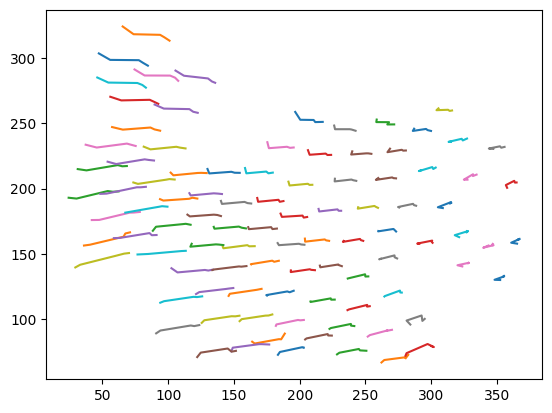

In [260]:
for i in range(95):
    plt.plot(cc_x[i,:], cc_y[i, :])


In [238]:
df

,cell_id_4800,cell_id_5100,cell_id_5400,cell_id_6300,cell_id_7200,cc_4800_x,cc_4800_y,cc_5100_x,cc_5100_y,cc_5400_x,cc_5400_y,cc_6300_x,cc_6300_y,cc_7200_x,cc_7200_y
0,150,28,26,21,20,1.647093,1.519735,1.647141,1.519553,1.646306,1.520498,1.634113,1.514350,1.632939,1.510527
1,3,31,28,24,2,1.636919,1.536513,1.634942,1.529695,1.633670,1.529906,1.619187,1.524604,1.617530,1.526850
2,34,34,32,25,25,1.671300,1.544634,1.669832,1.545083,1.669786,1.546855,1.660559,1.542552,1.659894,1.541581
3,37,36,35,28,27,1.677989,1.563961,1.676847,1.563618,1.676891,1.565169,1.668845,1.560986,1.668208,1.560323
4,41,40,38,31,29,1.605057,1.579889,1.601812,1.579452,1.599666,1.579074,1.579434,1.576459,1.576706,1.574824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,236,350,342,159,228,1.656489,1.676739,1.652758,1.676658,1.651954,1.677566,1.645034,1.677629,1.642355,1.680953
91,376,365,354,242,236,1.552277,1.708173,1.546897,1.709376,1.542495,1.710212,1.510454,1.710412,1.494799,1.713066
92,402,391,385,262,254,1.662322,1.569844,1.660629,1.569803,1.660414,1.570996,1.650437,1.567759,1.650436,1.568096
93,404,393,388,265,257,1.702580,1.612920,1.702217,1.613601,1.702437,1.614362,1.696908,1.612423,1.697691,1.612388


In [245]:
ce_4800=[cell_edges_4800[x] for x in cell_id_4800.astype(int)]
ce_5100=[cell_edges_5100[x] for x in cell_id_5100.astype(int)]
ce_5400=[cell_edges_5400[x] for x in cell_id_5400.astype(int)]
ce_6300=[cell_edges_6300[x] for x in cell_id_6300.astype(int)]
ce_7200=[cell_edges_7200[x] for x in cell_id_7200.astype(int)]

In [246]:
np.unique(ce_4800)

C:\Users\v35431nc\AppData\Roaming\Python\Python310\site-packages\numpy\lib\arraysetops.py:272: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

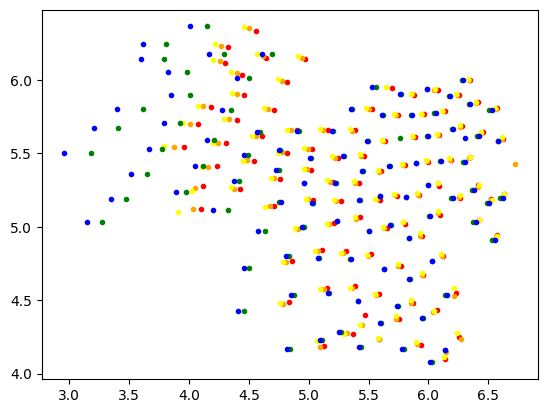

In [42]:
plt.scatter(cc_4800[:,0], cc_4800[:,1],marker ='.', color='red')
plt.scatter(cc_5100[:,0], cc_5100[:,1],marker ='.', color='orange')
plt.scatter(cc_5400[:,0], cc_5400[:,1],marker ='.', color='yellow')
plt.scatter(cc_6300[:,0], cc_6300[:,1],marker ='.', color='green')
plt.scatter(cc_7200[:,0], cc_6300[:,1],marker ='.', color='blue')


In [47]:
cc_x=np.vstack((cc_4800[:,0], cc_5100[:,0], cc_5400[:,0], cc_6300[:,0], cc_7200[:,0]))
cc_y=np.vstack((cc_4800[:,1], cc_5100[:,1], cc_5400[:,1], cc_6300[:,1], cc_7200[:,1]))

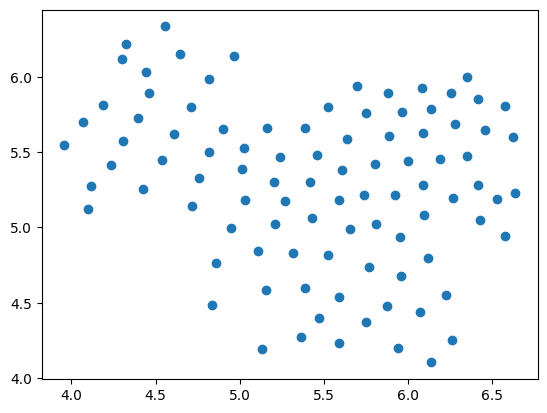